In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
salary=pd.read_csv(r'C:/Users/tegae/Downloads/Dataset09-Employee-salary-prediction.csv')

In [8]:
credit.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


<Axes: xlabel='count', ylabel='Education Level'>

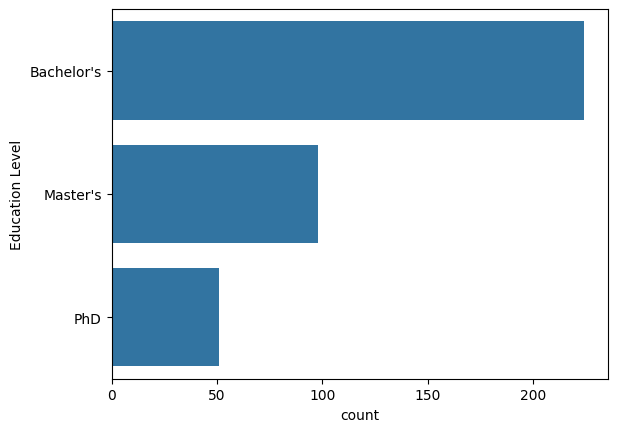

In [12]:
sns.countplot(credit['Education Level'])

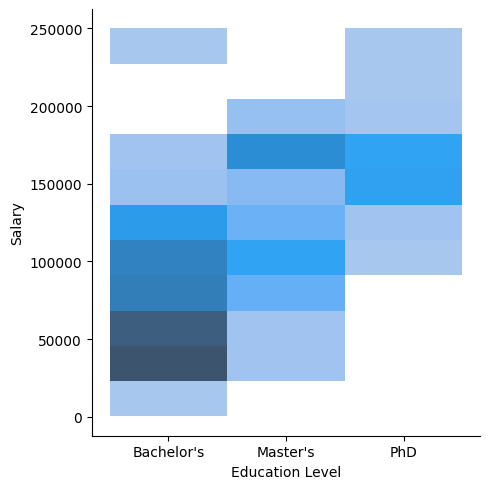

In [13]:
sns.displot(credit,x='Education Level',y='Salary')

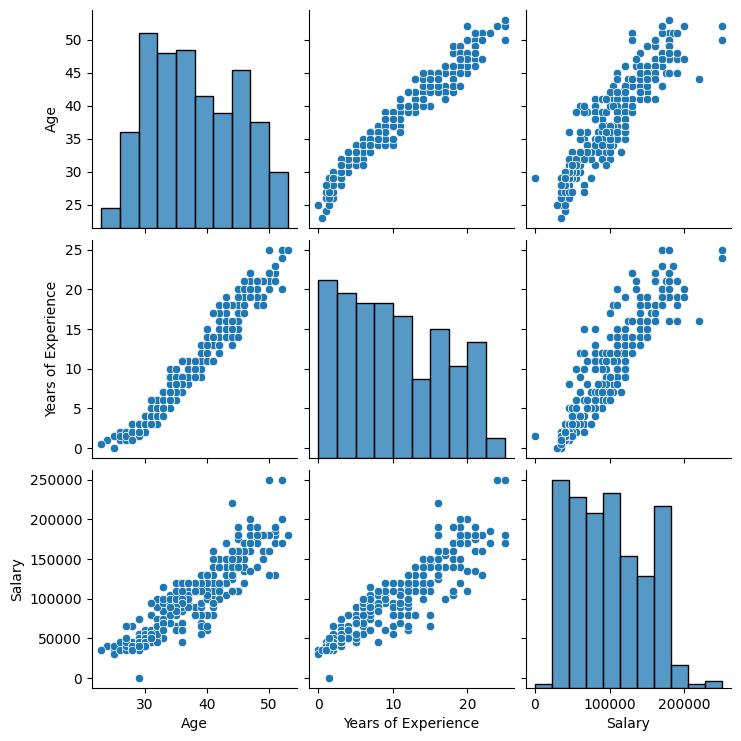

In [14]:
sns.pairplot(credit)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
laben=LabelEncoder()

In [17]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
freq=credit['Job Title'].value_counts()
credit['Job Title']=credit['Job Title'].map(freq)

In [26]:
credit['Education Level']=credit['Education Level'].map({"Bachelor's":0,"Master's":1,"PhD":2})

In [34]:
credit.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Job_Title_encoded
0,32.0,1,0.0,1.0,5.0,90000.0,1.0
1,28.0,0,1.0,2.0,3.0,65000.0,2.0
2,45.0,1,2.0,2.0,15.0,150000.0,2.0
3,36.0,0,0.0,2.0,7.0,60000.0,2.0
4,52.0,1,1.0,1.0,20.0,200000.0,1.0


In [33]:
credit['Gender']=pd.get_dummies(credit['Gender'],drop_first=True,dtype=int)

In [38]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               375 non-null    int32  
 2   Education Level      373 non-null    float64
 3   Job Title            373 non-null    float64
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(5), int32(1)
memory usage: 16.2 KB


In [37]:
credit.drop('Job_Title_encoded',axis=1,inplace=True)

In [65]:
credit.dropna(axis=0,how='any',inplace=True)
X=credit.drop('Salary',axis=1)
y=credit['Salary']

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler=StandardScaler()

In [42]:
X_scaled=scaler.fit_transform(X)

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
model=LinearRegression()

In [70]:
results=model.fit(X_train,y_train)

In [71]:
y_pred=results.predict(X_test)

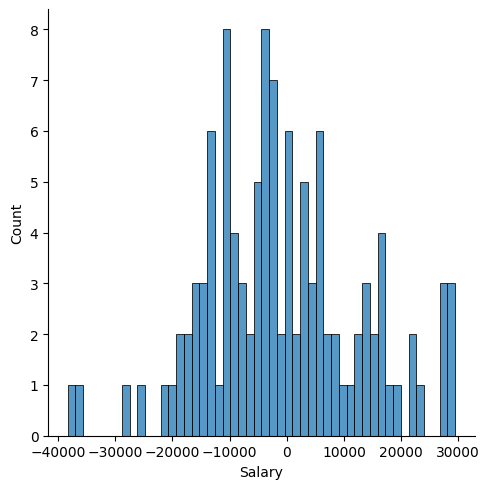

In [73]:
sns.displot(y_test-y_pred,bins=50)

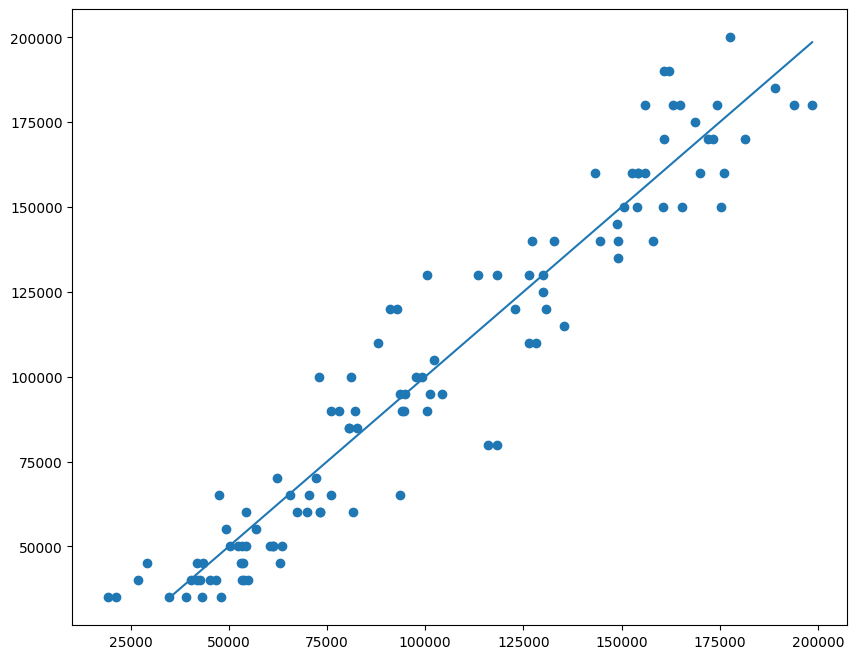

In [75]:
plt.figure(figsize=(10,8))
plt.scatter(y_pred,y_test)
plt.plot((y_test.min(),y_pred.max()),(y_test.min(),y_pred.max()))